# **Instagram Fake Profile Detection - by Mitnala Sree Varshini**

# Importing Required Libraries

This section imports the necessary libraries for data analysis, visualization, machine learning modeling, and evaluation.

> **Breakdown of the Imports:**

1. **Data Handling & Computation**:
   * pandas (pd): Used for loading and manipulating structured data.
   * numpy (np): Provides numerical computations and array operations.
2. **Data Visualization**:
    * matplotlib.pyplot (plt): Essential for creating visualizations like histograms and scatter plots.
    * seaborn (sns): Enhances matplotlib’s capabilities for statistical visualizations, such as heatmaps and violin plots.
3. **Machine Learning Model**:
    * XGBClassifier (from xgboost): Implements the XGBoost classifier, an optimized gradient boosting algorithm known for high accuracy and efficiency.
4. **Data Splitting for Training & Testing**:
    * train_test_split (from sklearn.model_selection): Splits the dataset into training and testing sets to evaluate model performance.
5. **Model Performance Evaluation Metrics**:
    * accuracy_score: Measures the percentage of correctly predicted labels.
    * classification_report: Generates a detailed performance report including precision, recall, and F1-score.
    * confusion_matrix: Displays a matrix of true positive, false positive, true negative, and false negative predictions.
    * roc_auc_score: Evaluates the model’s ability to distinguish between classes using the ROC curve.
    * log_loss: Measures classification uncertainty (lower values indicate better predictions).
    * matthews_corrcoef (MCC): Measures the correlation between actual and predicted values (ideal score = 1).
    * precision_score: Calculates positive predictive value, measuring how many predicted positives are actually positive.
    * recall_score: Measures sensitivity, identifying how many actual positives were detected correctly.
    * f1_score: Balances precision and recall using the harmonic mean.
6. **Additional Analysis & Model Reliability Checks**:
    * calibration_curve (from sklearn.calibration): Assesses model reliability by comparing predicted probabilities with actual class labels.
    * permutation_importance (from sklearn.inspection): Determines feature importance by randomly shuffling features and observing changes in model performance.
7. **Mathematical Operations**:
math: Provides mathematical functions like logarithms and rounding operations used in calculations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance
import math

# Downloadind Dataset from KaggleHub

This section automatically fetches the **Fake Instagram Profile Dataset from KaggleHub** and stores it locally for further analysis.

> Breakdown of the Code:

1. *Importing kagglehub:*
    * kagglehub is a Python library that allows users to download datasets directly from Kaggle into their workspace.
2. *Downloading the Dataset*:
    * Downloads the latest version of the dataset from Kaggle.
    * The dataset contains profile attributes of Instagram accounts, distinguishing between real and fake profiles.
3. *Storing the Dataset Path*:
    * The dataset is stored in the variable path, which contains the local directory where the files have been extracted.
4. *Printing the Dataset Location*:
    * Displays the exact directory path where the dataset is stored after downloading.

The dataset will be successfully downloaded and extracted into a specific directory (e.g., /root/.cache/kagglehub/datasets/...).
The printed output will confirm the file location, which will be used in the next steps for data loading and analysis.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajumavinmar/fake-instagram-profile-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-instagram-profile-dataset


# Loading and Inspecting the Dataset 

This section loads the dataset, performs an initial check on its structure, and prepares it for further analysis.

> Breakdown of the Code:

1. *Importing Required Libraries*:
    * os: Used to interact with the file system and check the available dataset files.
    * pandas (pd): Used to load and manipulate the dataset.
2. *Checking Available Files in the Dataset Directory*:
    * Defines the directory where the dataset is stored in Kaggle Notebooks.
    * Lists all files in the dataset folder to confirm the correct filename.
3. *Loading the Dataset*:
    * Reads the dataset into a pandas DataFrame.
    * The filename must be updated accordingly if different from "Instagram_fake_profile_dataset.csv".
4. *Dataset Exploration*:
    * df.info(): Displays data types, column names, and non-null counts to check for missing values.
    * df.isnull().sum(): Summarizes missing values in each column.
    * df.describe(): Provides statistical summaries (mean, min, max, quartiles) of numerical features.
5. *Renaming Columns for Easier Access*:
    * Removes spaces and replaces them with underscores (_) for easier column access in code.
    * Displays the updated column names after renaming.


> Expected Outcome:

* The dataset will be successfully loaded into a pandas DataFrame (df).
* A summary of the dataset structure (columns, types, missing values, and statistics) will be displayed.
* The column names will be cleaned for easier access in further analysis.

In [3]:
import os
import pandas as pd

# Check available files in the dataset folder
dataset_path = "/kaggle/input/fake-instagram-profile-dataset"
os.listdir(dataset_path)

# Load the dataset (replace 'your_file.csv' with the actual filename)
df = pd.read_csv(os.path.join(dataset_path, "Instagram_fake_profile_dataset.csv"))  # Update filename

# Display first few rows
df.info()
df.isnull().sum()
df.describe()

# Rename columns for easier access
df.columns = df.columns.str.strip().str.replace(' ', '_')
print("Columns in dataset:", df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           5000 non-null   int64  
 1   nums/length username  5000 non-null   float64
 2   fullname words        5000 non-null   int64  
 3   nums/length fullname  5000 non-null   float64
 4   name==username        5000 non-null   int64  
 5   description length    5000 non-null   int64  
 6   external URL          5000 non-null   int64  
 7   private               5000 non-null   int64  
 8   #posts                5000 non-null   int64  
 9   #followers            5000 non-null   int64  
 10  #follows              5000 non-null   int64  
 11  fake                  5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB
Columns in dataset: Index(['profile_pic', 'nums/length_username', 'fullname_words',
       'nums/length_fullname', 'name==user

# Understanding Statistical Metrics and Skewness in Data Analysis

This section calculates important statistical merics and skewness for better understanding of the dataset's distribution and variability.

When analyzing data, it’s crucial to understand how features are distributed. Statistical metrics help us interpret data variability, while skewness provides insights into the symmetry of distribution. Let's break these concepts down.

> Statistical Metrics: Understanding Data Distribution

Statistical metrics summarize key properties of a dataset, allowing us to interpret patterns and detect anomalies.


1️⃣ Mean (Average)
* The **mean** represents the central value of a dataset.
* Helps understand the central tendency of features.
* **Limitation**: Sensitive to outliers, which can distort the actual trend.

2️⃣ Standard Deviation (std)
* Measures how spread out the data points are around the mean.
* A low sd means values are closely clustured.
* A high sd means values are widely spread.
* Helps detect fluctuations in user behavior.

3️⃣ Median (50%)
* The middle value when data is sorted in ascending order.
* Unlike the mean, the median is not affected by outliers.
* Gives a more realistic measure of central tendency when the data is skewed.

> Understanding Skewness: Symmetry of Data Distribution

Skewness measures whether data is evenly distributed or concentrated more on one side.

1️⃣ Positive Skew (Right-Skewed, Skewness > 0)
* Tail extends towards the right (higher values).
* Example: #followers could be right-skewed, as some users have millions of followers while most have fewer.

2️⃣ Negative Skew (Left-Skewed, Skewness < 0)
* Tail extends towards the left (lower values).
* Example: #posts might be left-skewed if most users have a few posts, but some have extremely low values.

3️⃣ Normal Distribution (Skewness ≈ 0)
* Data is symmetrically distributed around the mean.
* Example: If most Instagram users have a balanced ratio of followers to follows, the data may have minimal skewness.

> Why These Metrics Matter?

* Mean & Median Comparison: If mean ≠ median, it indicates skewness in data.
* High Standard Deviation: Suggests extreme variations and possible outliers.
* Skewness Insight: Helps decide if data transformation (e.g., log scaling) is needed for better model performance.

In [4]:
# Additional Statistical Metrics
print("\nStatistical Metrics:")
print(df.describe().T[['mean', 'std', '50%']])
print("\nSkewness:")
print(df.skew())


Statistical Metrics:
                              mean            std         50%
profile_pic               0.598200       0.490311    1.000000
nums/length_username      0.166175       0.194733    0.089193
fullname_words            1.212800       0.890435    1.000000
nums/length_fullname      0.036068       0.106235    0.000000
name==username            0.007600       0.086855    0.000000
description_length       20.997200      33.234706    1.000000
external_URL              0.049600       0.217139    0.000000
private                   0.227800       0.419455    0.000000
#posts                  103.331400     377.804886   10.000000
#followers            51244.352000  596374.900095  145.000000
#follows                481.381800     761.530132  242.000000
fake                      0.500000       0.500050    0.500000

Skewness:
profile_pic             -0.400722
nums/length_username     1.127623
fullname_words           3.152433
nums/length_fullname     4.158731
name==username          1

# Understanding Feature Distributions in Data Analysis


Feature distribution analysis plays a crucial role in understanding the characteristics of a dataset. By visualizing how individual features are spread, we can uncover **patterns, trends, outliers, and skewness**, which directly impact model performance.  

Histograms and KDE (Kernel Density Estimation) plots are powerful tools for examining distributions. A **normal (bell-shaped) distribution** indicates that most values are centered around the mean, which is ideal for many machine learning models. However, real-world data often exhibits **skewness**, where values are concentrated more toward one side. For example, in a social media dataset, features like the **number of followers** or **number of posts** tend to be **right-skewed**—most users have a low count, but a few influencers have extremely high values.  

Another key observation from feature distributions is the **presence of outliers**. If a histogram shows a long tail, it suggests that certain accounts exhibit extreme behavior (e.g., spam accounts with an unusually high number of posts or bot-like usernames). Identifying such anomalies is crucial as they can **distort model predictions** if not handled properly.  

Additionally, feature distributions help in detecting **class imbalances**. If categorical variables (such as “private account” status) show an uneven distribution, it may indicate that **one class dominates the dataset**, potentially leading to biased model predictions. Techniques like **oversampling, undersampling, or weighting adjustments** might be needed to ensure fairness in classification tasks.  

Overall, analyzing feature distributions provides **valuable insights** that guide **feature engineering, data preprocessing, and model selection**. It helps determine whether transformations like **log scaling, normalization, or outlier removal** are required to improve the model’s robustness and accuracy. Thus, this step is fundamental in ensuring **better interpretability and performance** of machine learning models. 🚀


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

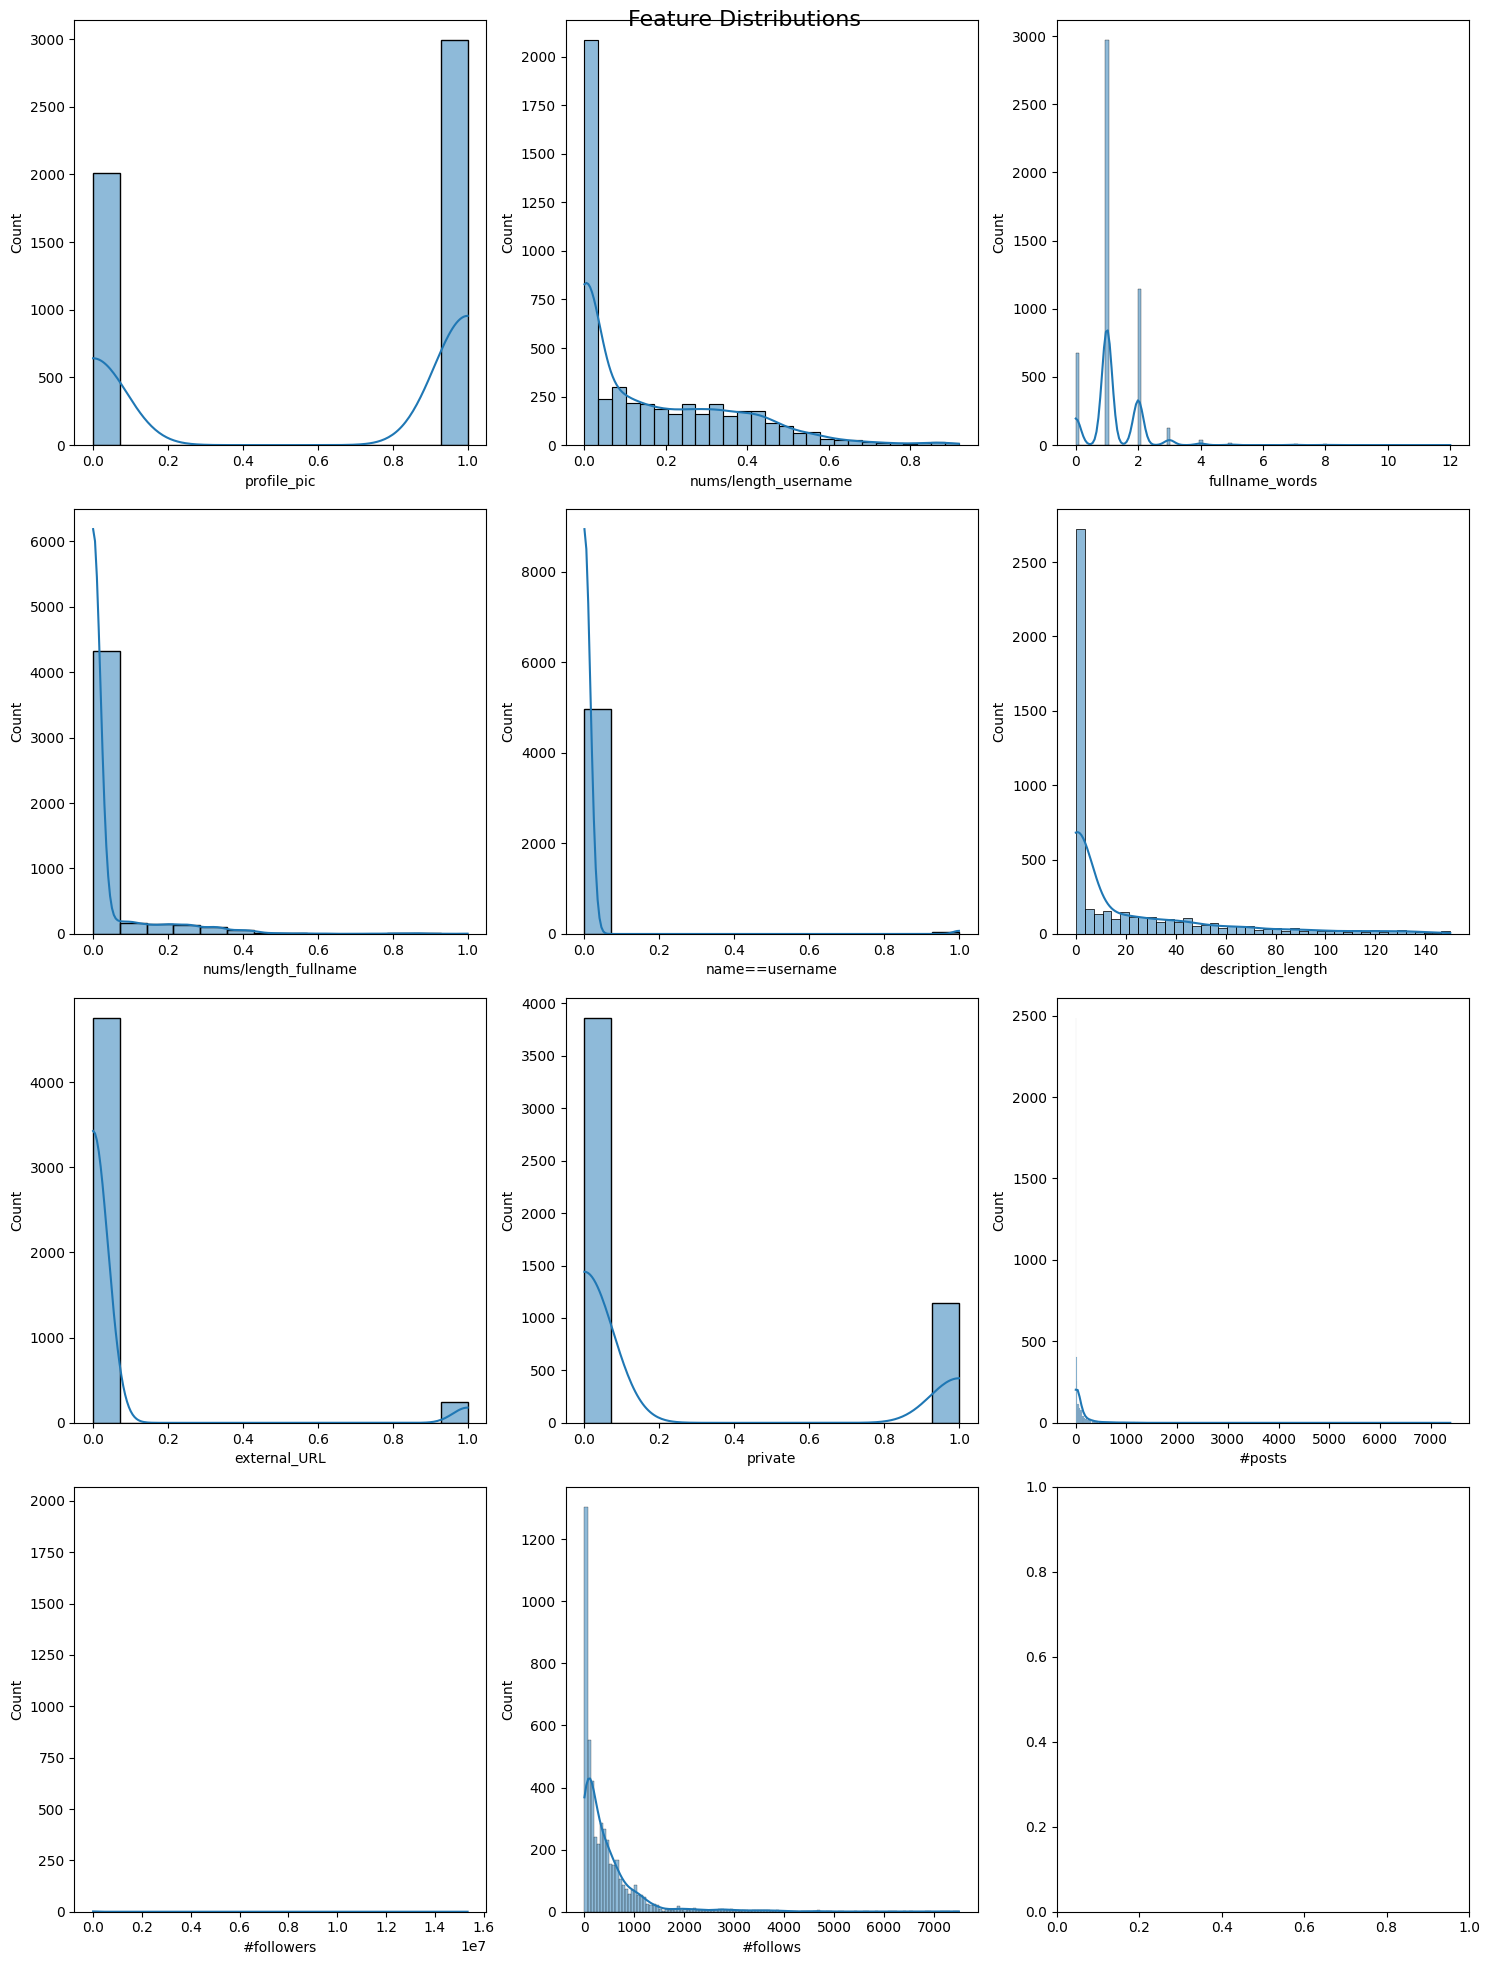

In [5]:
# Data Visualization - Feature Distributions
num_features = len(df.columns[:-1])
rows = math.ceil(num_features / 3)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
fig.suptitle("Feature Distributions", fontsize=16)
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

### Feature Spread Analysis using KDE and Boxplots  

#### 🔍 **Why Analyze Feature Spread?**  
Feature spread analysis is essential in understanding the **distribution, variance, and presence of outliers** in the dataset. By utilizing **Kernel Density Estimation (KDE) plots** and **boxplots**, we gain insights into:  
1. **Data Distribution** – Whether the feature follows a normal, skewed, or bimodal distribution.  
2. **Outliers** – Unusual values that may impact model performance.  
3. **Feature Scaling Needs** – If certain features require normalization or transformation for better learning.  

#### 📈 **Kernel Density Estimation (KDE) Plots**  
- KDE plots provide a **smoothed version of a histogram**, representing the **probability density** of data points.  
- A **sharp peak** suggests that most values are concentrated around a specific range.  
- A **flat or multi-peaked curve** may indicate a diverse distribution, possibly due to **mixed patterns** (e.g., real vs. fake accounts having different behaviors).  
- If the distribution is **skewed (left or right)**, it may require **log transformation** or **scaling** to improve model interpretability.  

#### 📊 **Boxplots for Outlier Detection**  
- Boxplots are powerful visual tools for detecting **outliers** and understanding the **spread of data** using quartiles.  
- The **box** represents the **interquartile range (IQR)** (middle 50% of data).  
- The **line inside the box** represents the **median** (50th percentile), which helps in identifying skewness.  
- **Whiskers** extend to the smallest and largest values **within 1.5 times the IQR**, and **points beyond whiskers** are considered **outliers**.  

#### 🔬 **Interpreting the Output**  
1. **Skewness & Normality**  
   - If KDE plots are **symmetrical**, the data is normally distributed.  
   - If **left-skewed**, it indicates more **lower values** (e.g., many accounts with very few followers).  
   - If **right-skewed**, there are **extremely high values** (e.g., some accounts with millions of followers).  

2. **Outliers & Data Cleaning**  
   - Boxplots reveal **outliers**, which could be spam accounts or fake profiles with unrealistic metrics.  
   - Features like **followers, posts, and follows** tend to have **high variability**, meaning some accounts behave abnormally.  
   - Removing **extreme outliers** can improve model performance by preventing overfitting.  

3. **Data Preprocessing Decisions**  
   - **Highly skewed distributions** may require **log transformation or scaling**.  
   - **Outlier-heavy features** should be handled using **clipping or robust statistical methods**.  
   - If two distributions are significantly different, **feature engineering** (e.g., **binning into categories**) might be needed.  

By analyzing these plots, we refine our dataset to ensure **more stable, accurate, and generalizable machine learning models**. 🚀

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

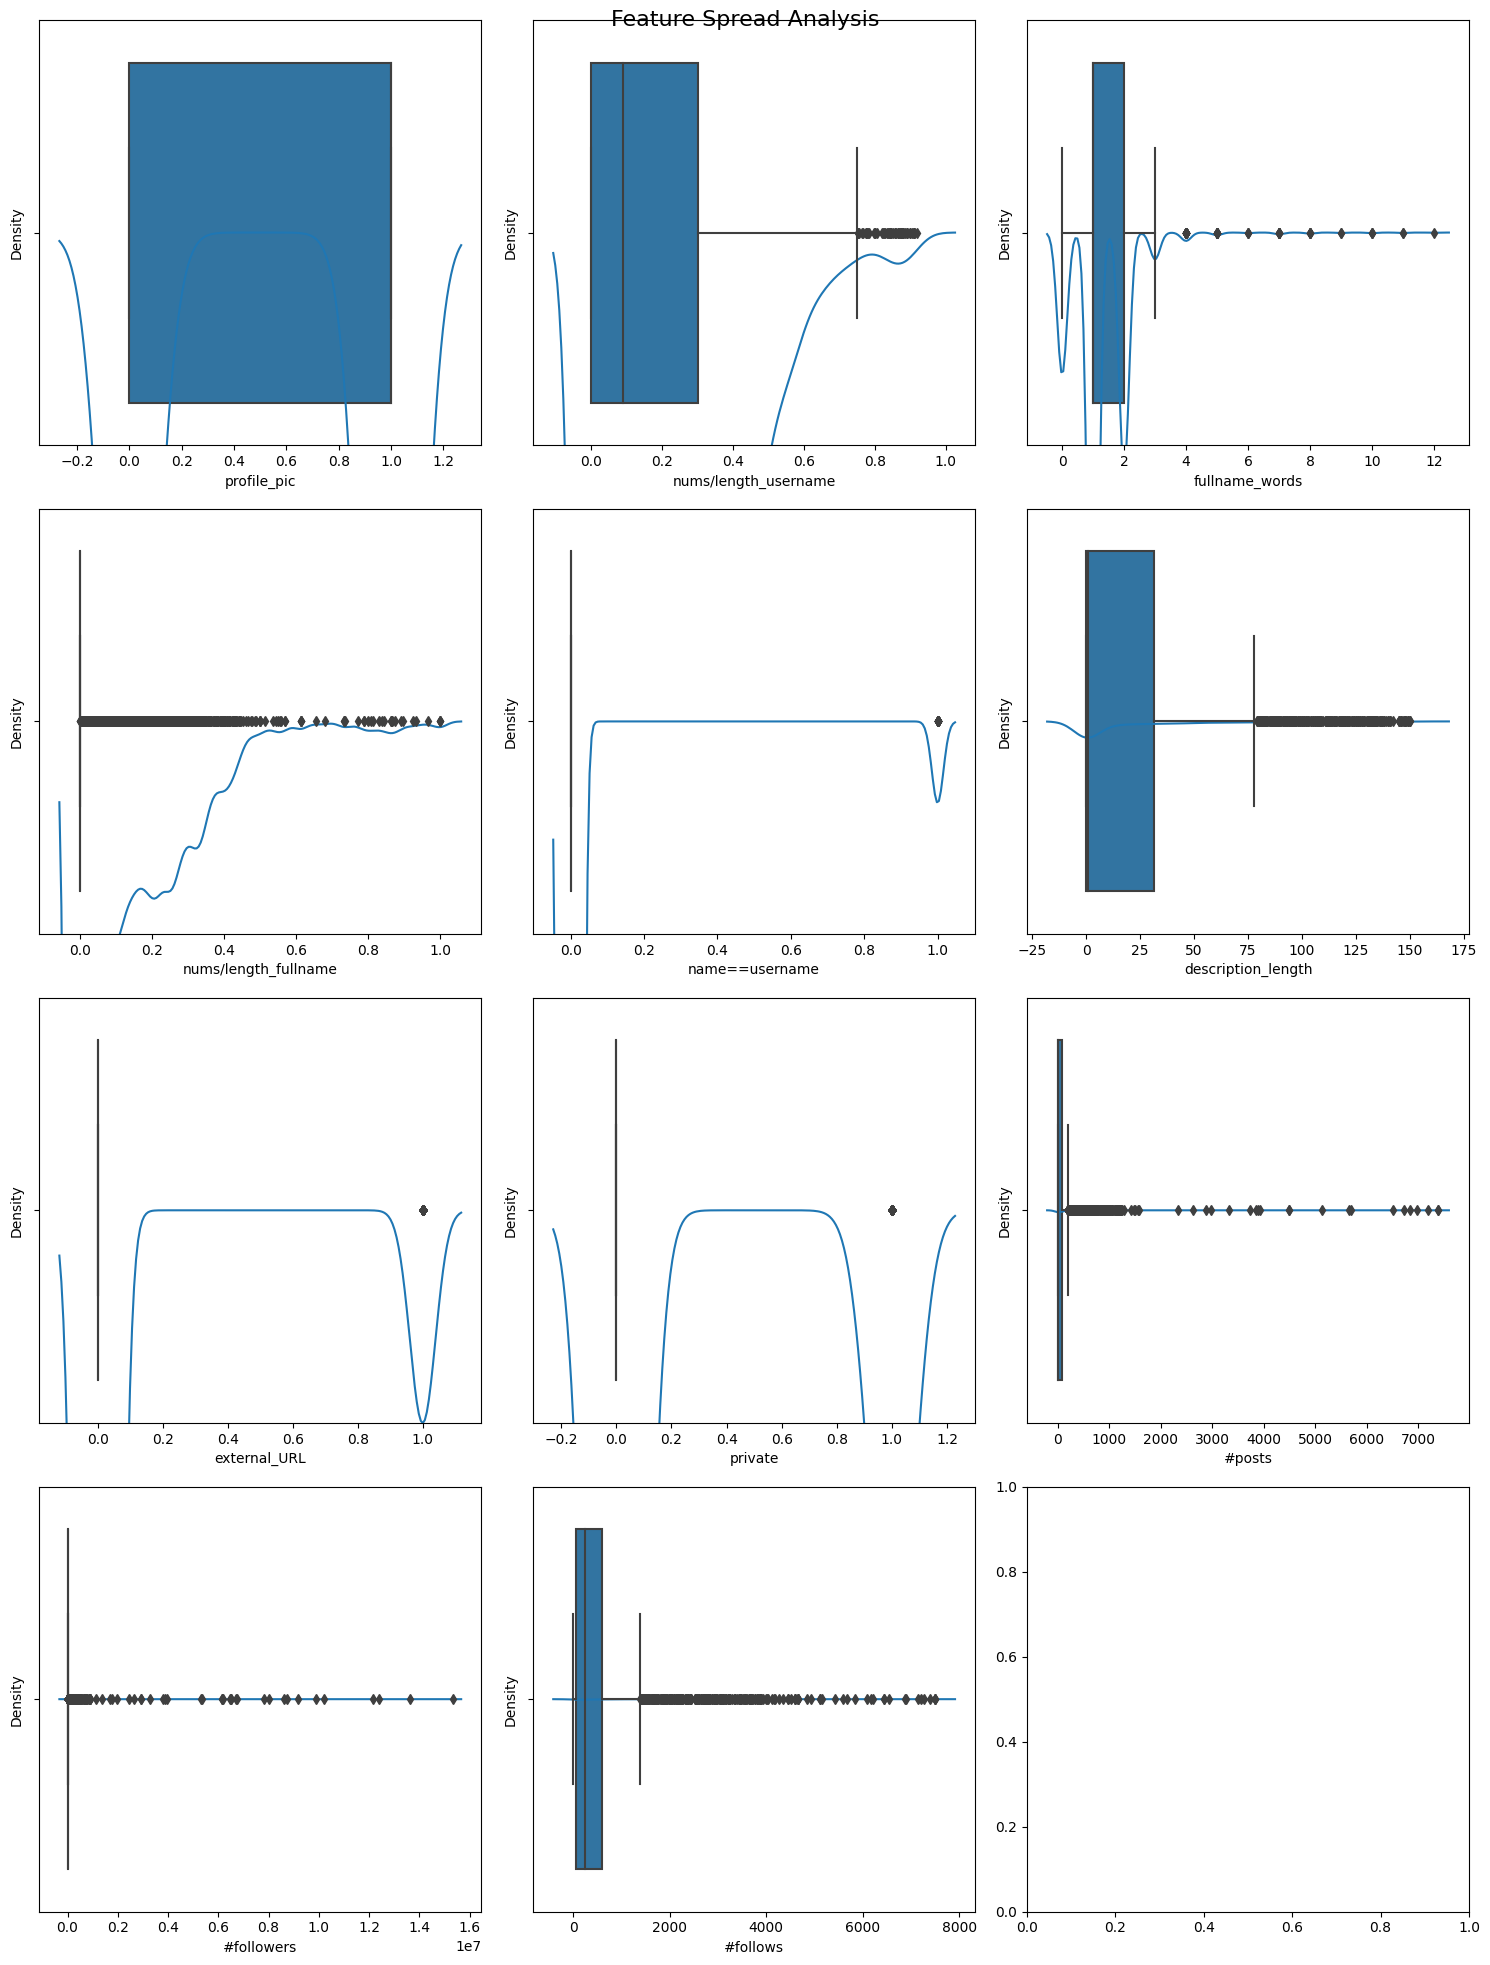

In [6]:
# KDE and Boxplots
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
fig.suptitle("Feature Spread Analysis", fontsize=16)
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):
    sns.kdeplot(df[col], ax=axes[i])
    sns.boxplot(x=df[col], ax=axes[i])
plt.tight_layout()
plt.show()

### 🔗 **Pairplot for Feature Relationships**  

#### 📌 **What is a Pairplot?**  
A **pairplot** is a **grid of scatter plots** that visualizes the relationships between multiple numerical features in the dataset. It is particularly useful for:  
- Identifying **correlations** between features.  
- Detecting **clusters** and patterns in the data.  
- Observing **class separation** between **real** and **fake** profiles.  

#### 🎯 **Key Observations from the Output**  
1. **Feature Correlations:**  
   - A **strong linear relationship** (diagonal alignment of points) between two features suggests **high correlation**.  
   - Features with **weak or scattered relationships** may be **independent** or contribute less to model prediction.  
   
2. **Class Separation:**  
   - If the fake and real accounts have **distinct clusters**, it means the dataset is well-separated.  
   - Overlapping points indicate that some features may not contribute significantly to classification.  

3. **Outliers & Distribution Differences:**  
   - Extreme points in scatter plots may indicate **outliers** that need further investigation.  
   - Some features may show **different distributions for fake vs. real accounts**, which can help in feature selection.  

4. **Diagonal Elements (Histograms/KDE Plots):**  
   - The diagonal plots represent the **distribution of individual features**.  
   - If **fake and real accounts have different distributions**, those features might be **strong predictors**.  

#### 📌 **How to Use These Insights?**  
- **Feature Engineering:** Remove or transform features that do not provide class distinction.  
- **Outlier Handling:** Extreme points can be capped, removed, or adjusted.  
- **Dimensionality Reduction:** Features that are highly correlated might be reduced using PCA or feature selection techniques.  

Pairplots provide a **holistic view** of how features interact and contribute to class separation, helping us fine-tune our machine-learning model. 🚀

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

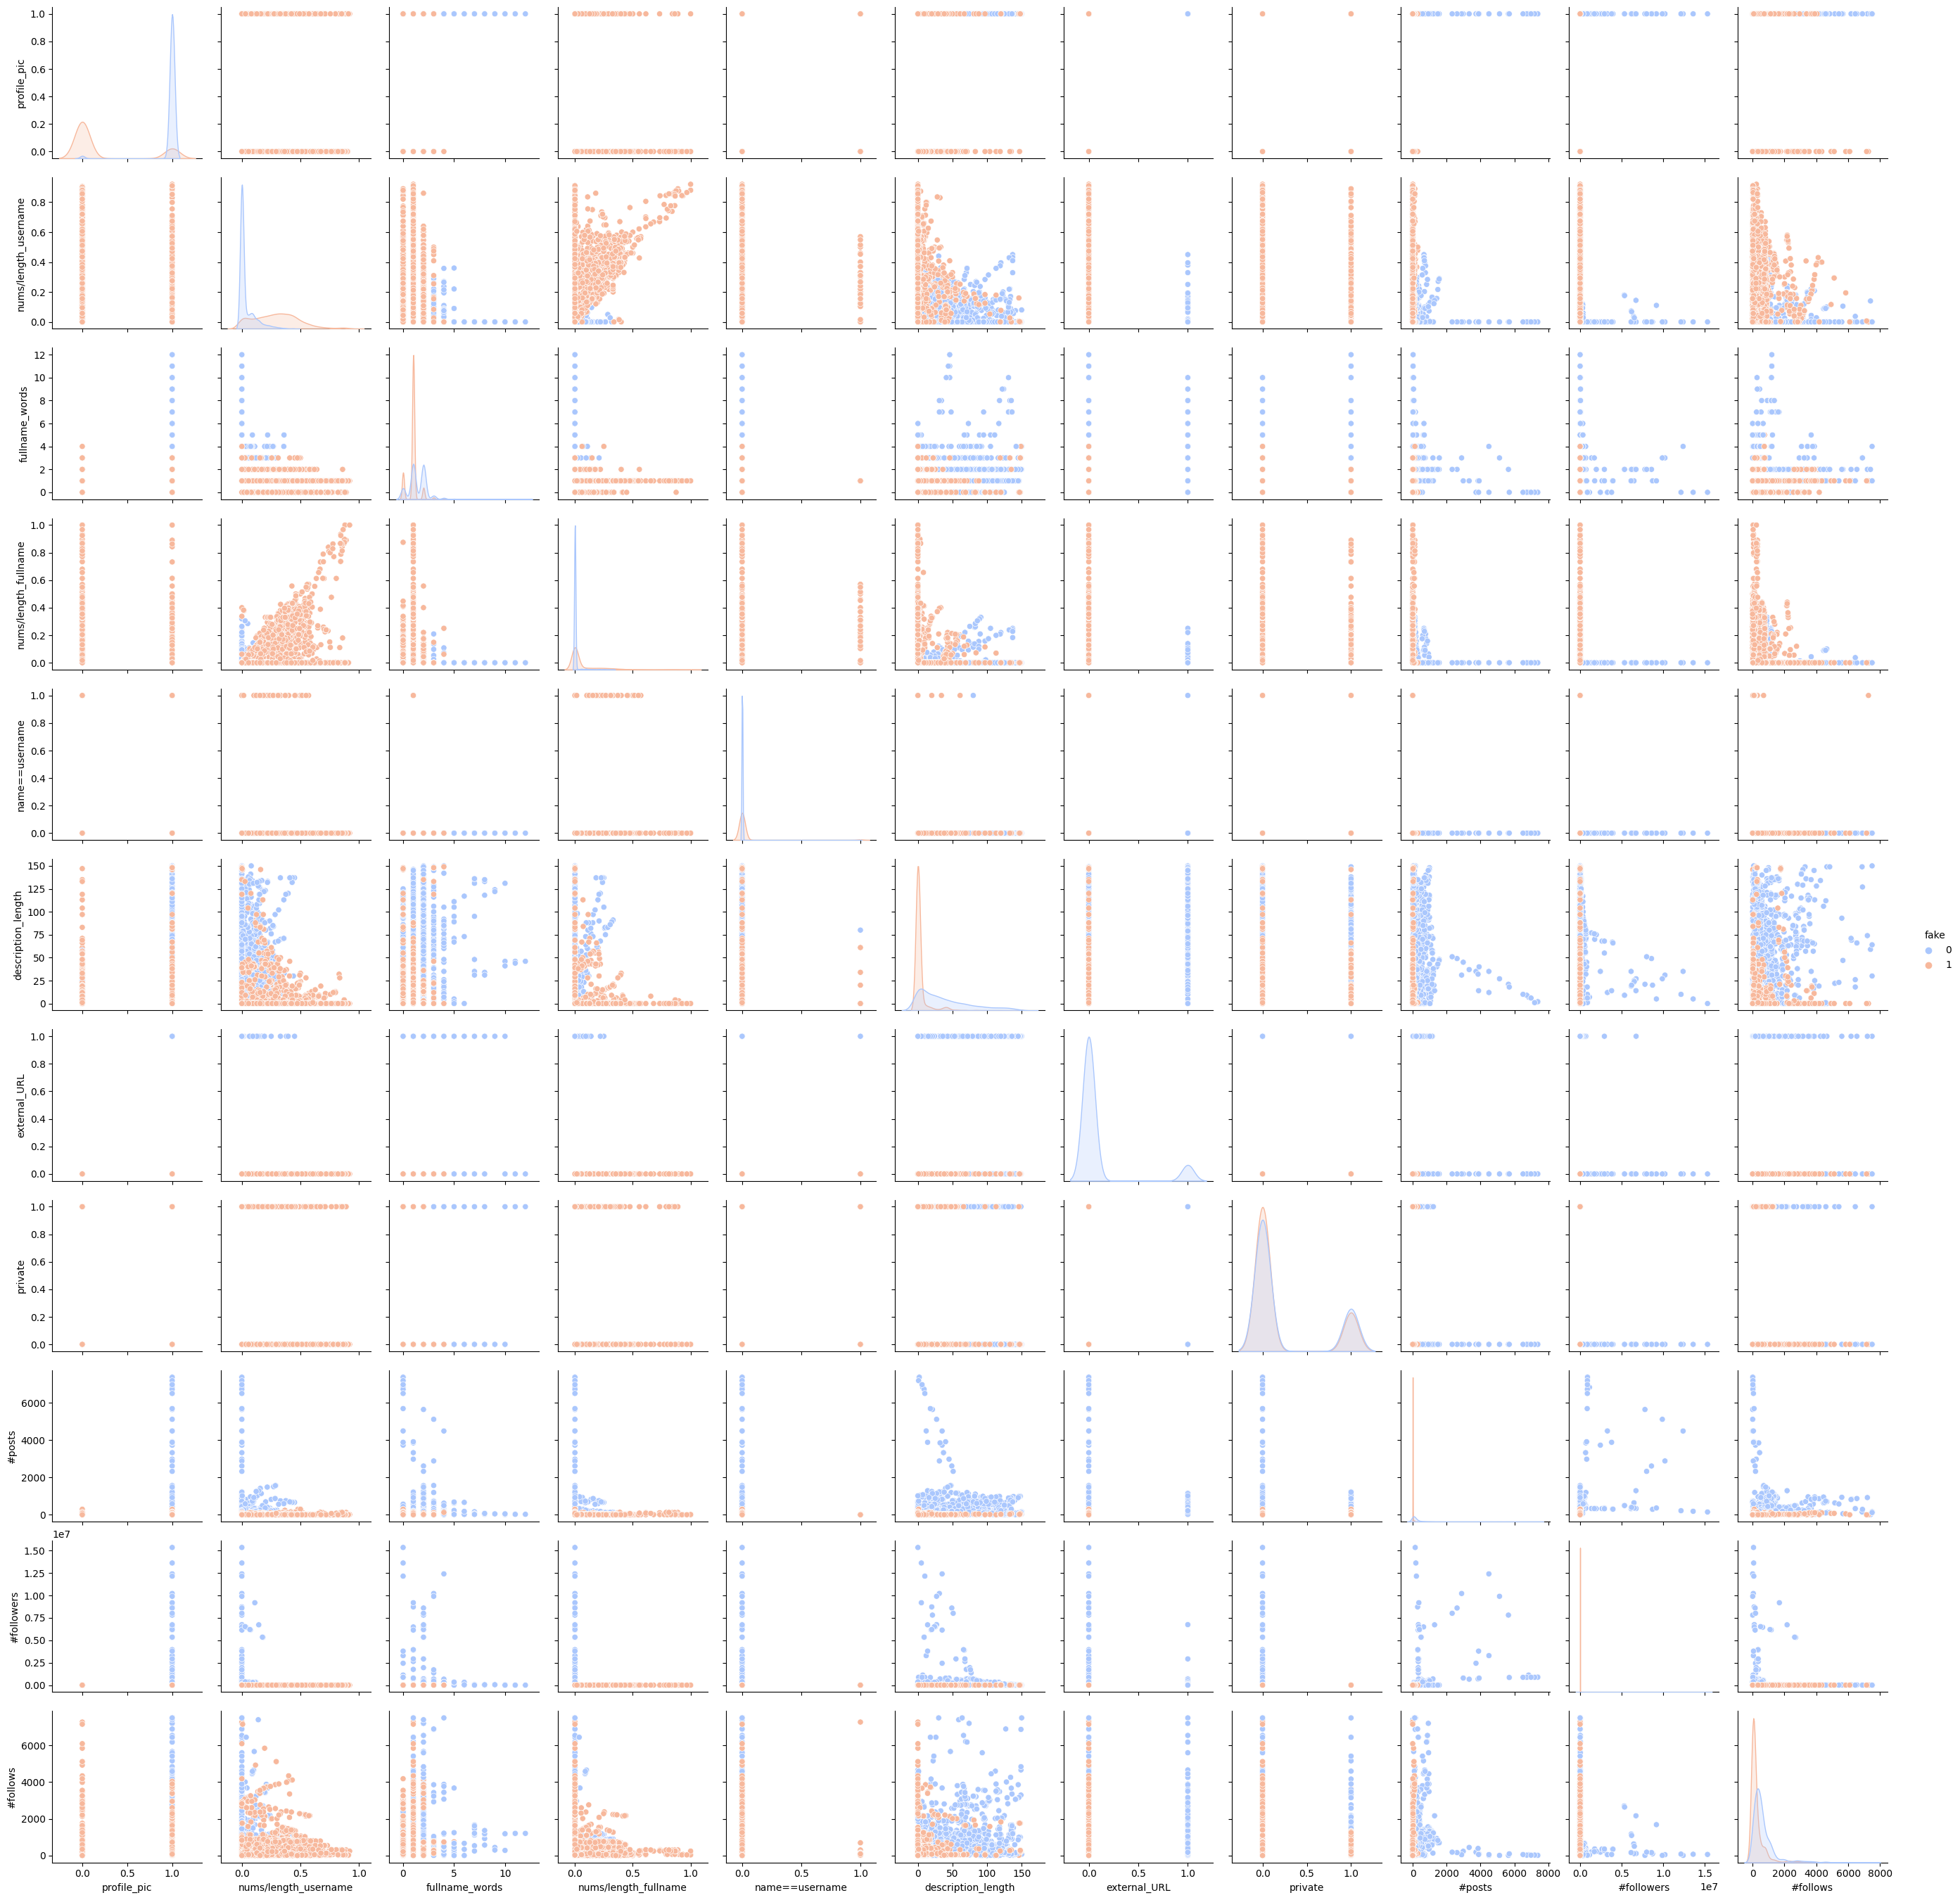

In [7]:
# Pairplot for Feature Relationships
sns.pairplot(df, hue='fake', palette='coolwarm')
plt.show()

###  **Feature Correlation Matrix**  

#### 📌 **What is a Correlation Matrix?**  
A **correlation matrix** is a heatmap that shows how strongly numerical features are related to each other. It helps in:  
- **Identifying highly correlated features** that may be redundant.  
- **Understanding feature importance** for predicting fake vs. real profiles.  
- **Detecting potential collinearity**, which can affect model performance.  

#### 🎯 **Key Observations from the Heatmap Output**  
1. **Correlation Values:**  
   - Values range from **-1 to +1**:  
     - **+1** → Strong **positive correlation** (as one increases, the other also increases).  
     - **-1** → Strong **negative correlation** (as one increases, the other decreases).  
     - **0** → No correlation.  

2. **High Positive Correlations:**  
   - If two features have a correlation **above 0.75**, they might be **redundant** and could be removed or combined.  

3. **High Negative Correlations:**  
   - A strong **negative correlation** suggests that one feature is inversely related to another.  

4. **Feature Relationship with Target Variable (`fake`):**  
   - Features with **high correlation (positive or negative) with `fake`** are **strong predictors**.  
   - Low-correlation features might contribute less and could be removed to simplify the model.  

#### 📌 **How to Use These Insights?**  
✅ **Remove redundant features** to prevent multicollinearity issues.  
✅ **Select features that have a strong correlation** with `fake` to improve model performance.  
✅ **Feature engineering:** Create new features by combining correlated ones (e.g., ratios or interactions).  

A well-analyzed **correlation matrix** ensures we use only the **most relevant features** for building an accurate and efficient machine-learning model. 🚀

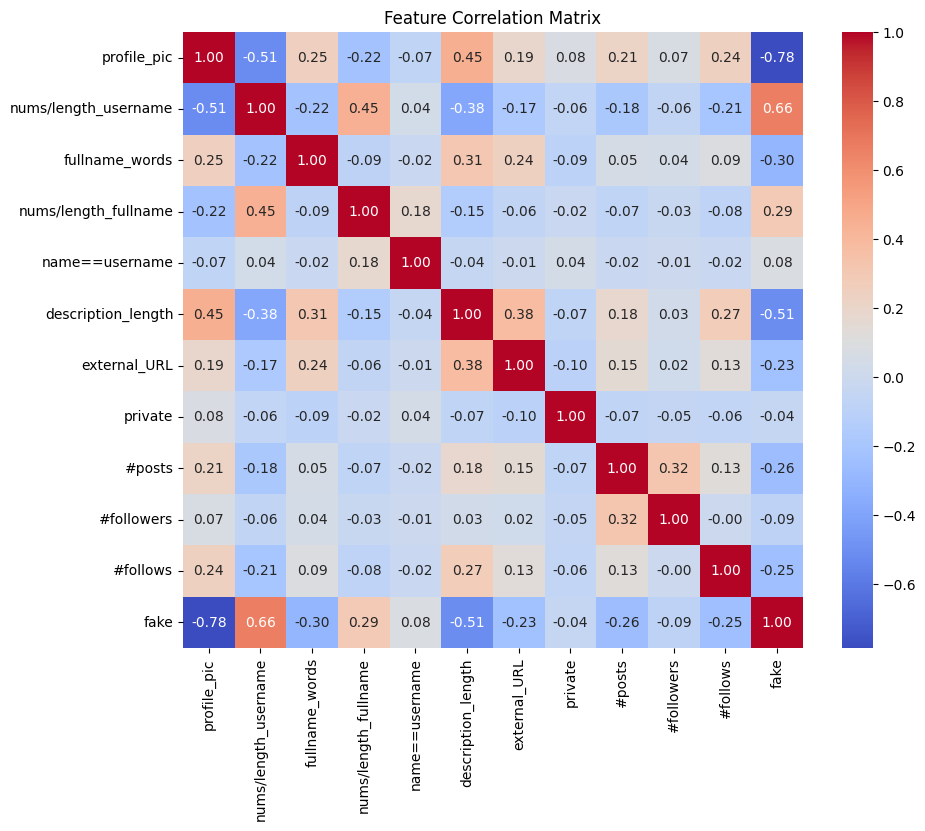

In [8]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

###  **Multiplots: Fake vs. Real Profile Comparisons**  

#### 📌 **Understanding Violin Plots for Fake vs. Real Profiles**  
Violin plots provide a **detailed view** of how numerical features differ between **fake and real Instagram profiles** by displaying:  
1. **Data distribution** (like KDE plots) within each category (`fake=0` for real profiles, `fake=1` for fake profiles).  
2. **Feature spread** (range, median, and interquartile ranges) to show variations between groups.  
3. **Outliers and density** to highlight any extreme values or patterns.  

#### 🎯 **Key Observations from the Output**  
1. **Feature Separability:**  
   - If the two distributions (fake vs. real) **look very different**, the feature is useful in distinguishing fake profiles.  
   - If the two distributions **overlap significantly**, that feature may not be a strong predictor.  

2. **Features That Distinguish Fake and Real Profiles:**  
   - Some features may have a **higher concentration of extreme values** in fake profiles (e.g., `#followers`, `#posts`).  
   - **Symmetry vs. Skewness:**  
     - A **symmetrical** violin plot suggests a normal distribution.  
     - A **skewed** violin plot (leaning left or right) suggests a bias in data distribution.  

3. **Insights for Feature Engineering:**  
   - Features that show **clear differences** can be prioritized for model training.  
   - If real and fake accounts have **similar feature distributions**, additional **feature transformations** may be needed.  

#### 📌 **How This Helps in Model Building?**  
✅ Helps identify **discriminative features** to improve classification accuracy.  
✅ Suggests **feature transformations** if a feature has a strong skew or outliers.  
✅ Provides a **visual way to validate feature importance** before feeding them into machine learning models.  

These multiplots give a **powerful comparative insight** into how fake and real Instagram profiles differ, guiding **better feature selection and model optimization**. 🚀

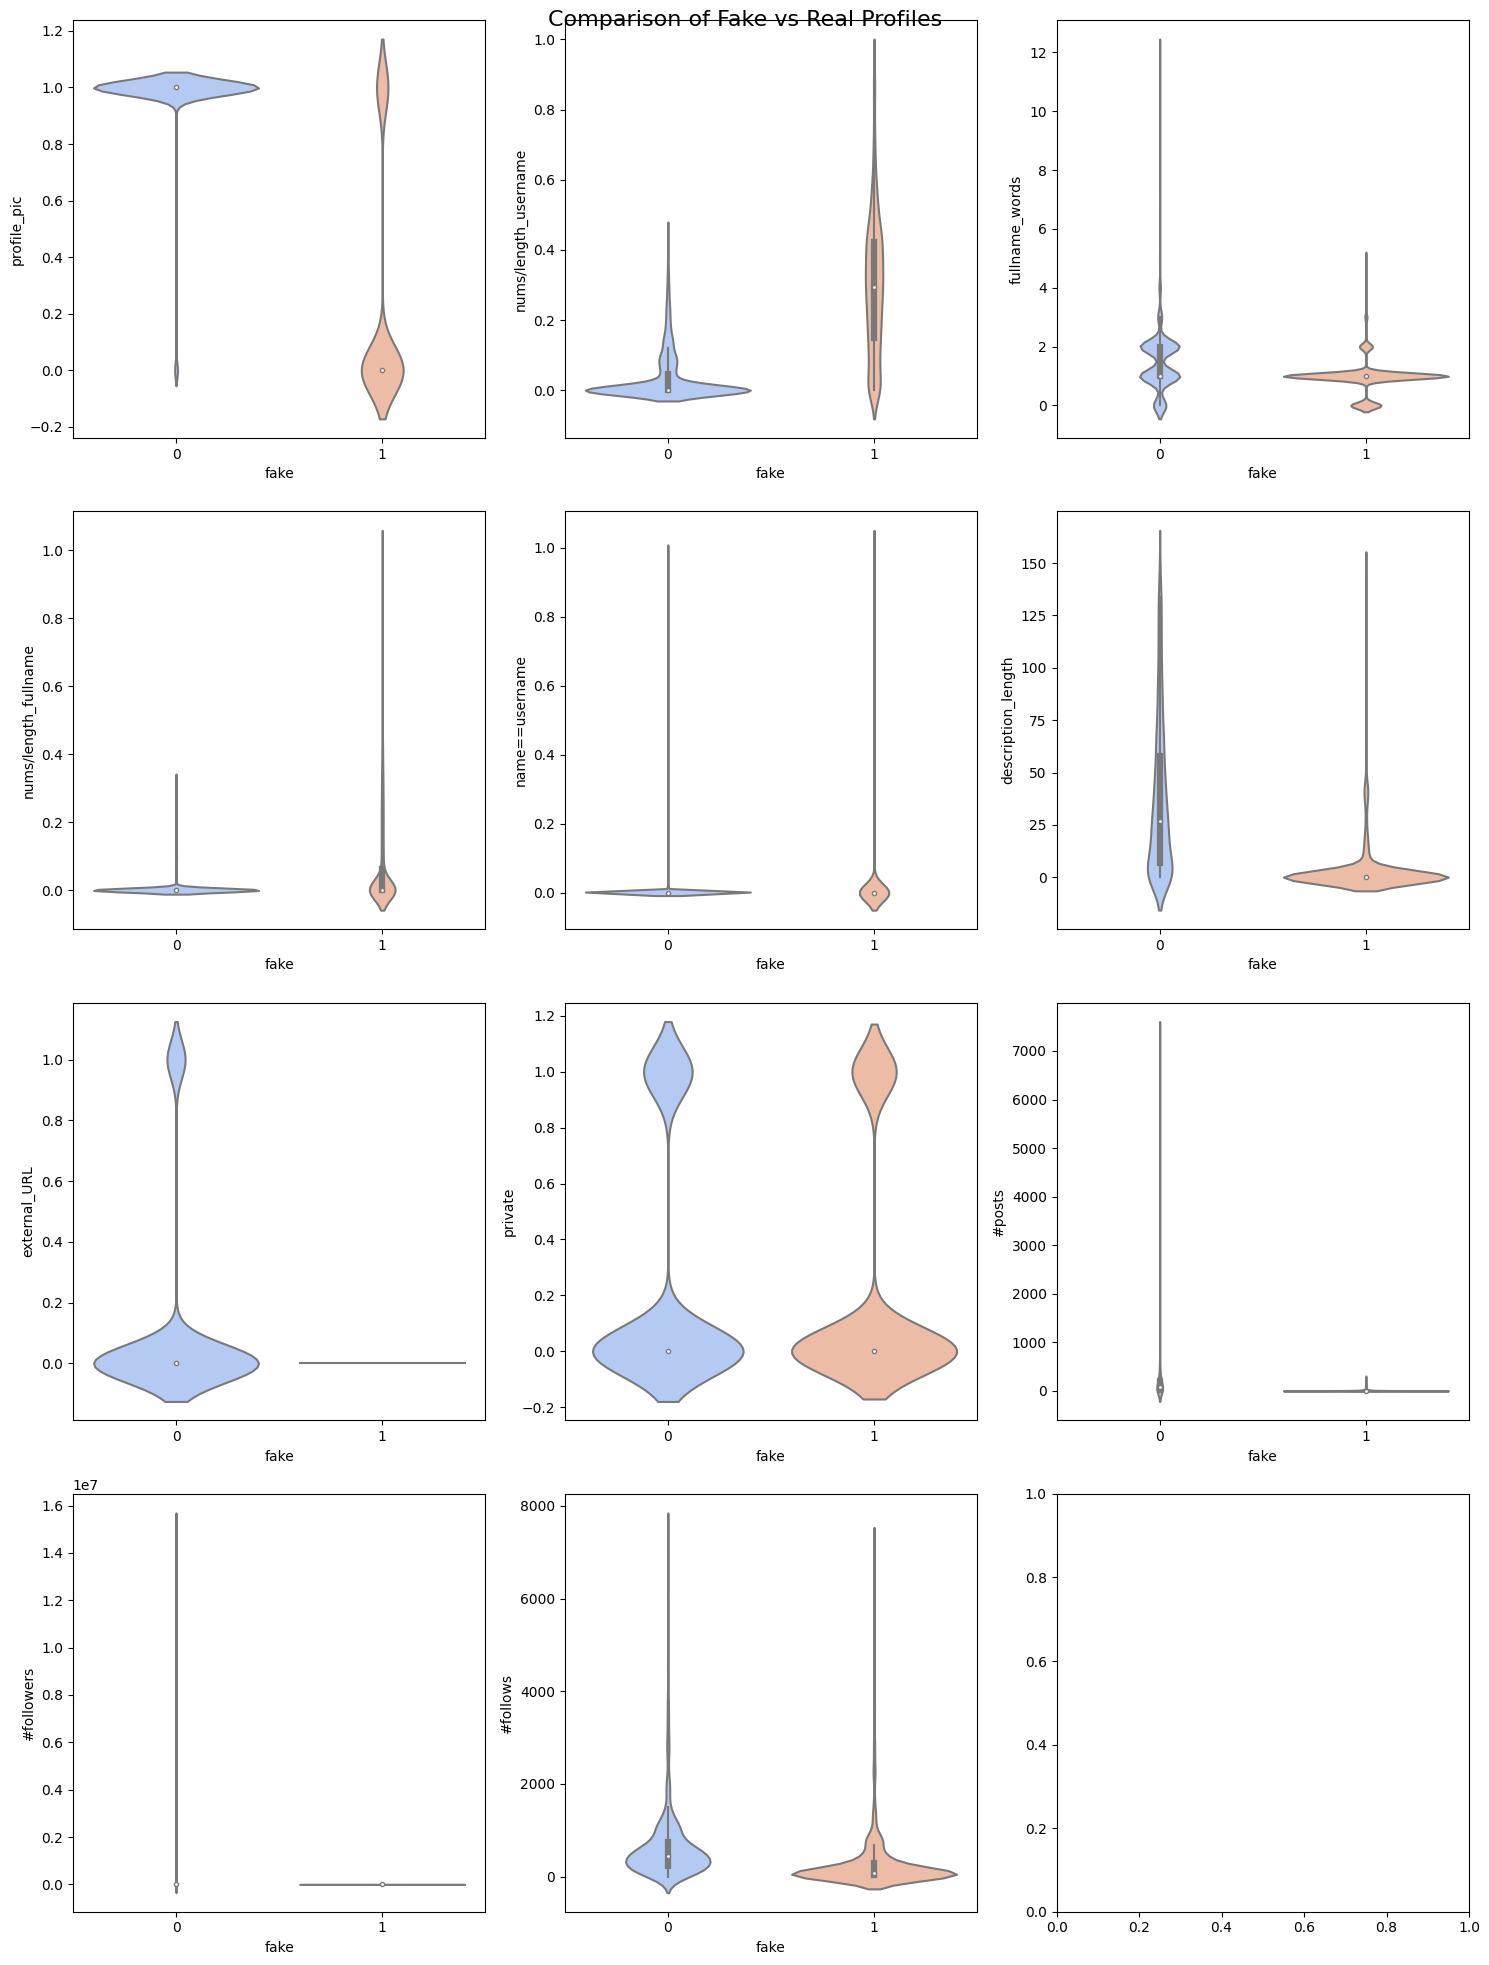

In [9]:
# Multiplots: Fake vs. Real Profile Comparisons
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
fig.suptitle("Comparison of Fake vs Real Profiles", fontsize=16)
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):
    sns.violinplot(x=df['fake'], y=df[col], ax=axes[i], palette='coolwarm')
plt.tight_layout()
plt.show()


###  **Train-Test Split & Model Training Explanation**  

#### 📌 **1️⃣ Train-Test Split**  
Before training a machine learning model, the dataset is split into **training and testing sets** to ensure proper model evaluation. The training set is used to learn patterns, while the test set evaluates model performance on unseen data.  

In this case, **80% of the dataset** is allocated for training, and **20% is reserved for testing**. The target variable, which identifies fake accounts, is separated from the features. A fixed random state ensures reproducibility, meaning the same split occurs every time the code runs.  

---

#### 📌 **2️⃣ Training XGBoost Model**  
XGBoost (**Extreme Gradient Boosting**) is an advanced ensemble learning algorithm that improves prediction accuracy by combining multiple decision trees. It is widely used due to its speed, scalability, and high predictive power.  

In this model:  
- **200 decision trees** (estimators) are used to refine predictions.  
- **A learning rate of 0.1** ensures that each new tree corrects errors from previous ones while preventing overfitting.  
- **Log loss** is used as the evaluation metric, as it is well-suited for classification problems.  
- The model is trained using the training dataset, learning complex relationships between account features and the likelihood of being fake.  

Once trained, the model generates predictions for the test dataset. These predictions include both class labels (fake or real) and probability scores, which will be used for further evaluation.

In [10]:
# Train-Test Split
X = df.drop(columns=['fake'])
y = df['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

###  **Model Evaluation - Understanding Performance Metrics**  

Once the model is trained, it is essential to evaluate its performance using various metrics. These metrics help determine how well the model distinguishes between **fake and real Instagram profiles**.  

---

### 🔹 **Key Performance Metrics Explained**  

1️⃣ **Accuracy**  
   - Measures the proportion of correctly classified profiles out of the total test samples.  
   - **Formula:** \( \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} \)  
   - **Higher accuracy (>97%) indicates a highly effective model.**  

2️⃣ **ROC-AUC Score** (Receiver Operating Characteristic - Area Under Curve)  
   - Evaluates the model’s ability to distinguish between fake and real accounts.  
   - **Ranges from 0 to 1** (higher values indicate better discrimination).  
   - **Closer to 1 = strong classification power.**  

3️⃣ **Log Loss**  
   - Measures the uncertainty in predictions by penalizing incorrect probability estimates.  
   - **Lower log loss values indicate better-calibrated probability outputs.**  

4️⃣ **Matthews Correlation Coefficient (MCC)**  
   - A balanced metric that considers **true positives, true negatives, false positives, and false negatives**.  
   - **Ranges from -1 to 1** (1 = perfect classification, 0 = random guessing, -1 = completely wrong predictions).  
   - More **reliable** than accuracy for imbalanced datasets.  

5️⃣ **Precision**  
   - Measures how many of the predicted fake accounts are actually fake.  
   - **High precision reduces false positives.**  

6️⃣ **Recall (Sensitivity)**  
   - Measures how many actual fake profiles are correctly identified.  
   - **High recall ensures fewer fake accounts are missed.**  

7️⃣ **F1-Score**  
   - Harmonic mean of **precision and recall** (balances both metrics).  
   - **Useful when class distribution is imbalanced.**  

---

### 📌 **Classification Report**  
- **Displays precision, recall, and F1-score for each class (Fake & Real profiles).**  
- **Helps in diagnosing model strengths and weaknesses.**  

✅ **If accuracy is high (>97%) and ROC-AUC approaches 1, the model is highly effective in detecting fake Instagram profiles.**

In [11]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.9900
ROC-AUC Score: 0.9983
Log Loss: 0.0429
Matthews Correlation Coefficient: 0.9800
Precision: 0.9940
Recall: 0.9861
F1-score: 0.9900

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       498
           1       0.99      0.99      0.99       502

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



###  **Confusion Matrix - Understanding Model Errors**  

A **confusion matrix** is a crucial tool in evaluating the performance of a classification model. It provides insights into **correct** and **incorrect predictions** by breaking them into four categories:  

#### 🔹 **Components of a Confusion Matrix**  

| **Actual / Predicted** | **Predicted: Fake** | **Predicted: Real** |
|-----------------|----------------|--------------|
| **Actual: Fake** | ✅ True Positives (TP) | ❌ False Negatives (FN) |
| **Actual: Real** | ❌ False Positives (FP) | ✅ True Negatives (TN) |

- **True Positives (TP):** Fake accounts correctly identified as fake.  
- **False Positives (FP):** Real accounts mistakenly classified as fake (**Type I Error**).  
- **False Negatives (FN):** Fake accounts incorrectly classified as real (**Type II Error**).  
- **True Negatives (TN):** Real accounts correctly identified as real.  

---

### 📊 **What Does the Confusion Matrix Tell Us?**  

✅ **High True Positives (TP) and True Negatives (TN):**  
   - The model is making mostly correct predictions.  

❌ **High False Positives (FP):**  
   - Indicates that **many real accounts are wrongly flagged as fake.**  
   - Could lead to user dissatisfaction in a real-world scenario.  

❌ **High False Negatives (FN):**  
   - Fake accounts are slipping through detection, making the model unreliable.  
   - A major concern for **fraud prevention**.  

✅ **Balanced Errors:**  
   - If FP and FN are low, the model is **well-calibrated** and effective.  

---

### 🎯 **Ideal Goal:**  
- **Maximize TP & TN** (correct predictions).  
- **Minimize FP & FN** (reduce misclassification).  
- **A well-balanced confusion matrix ensures accurate and fair fake profile detection.**

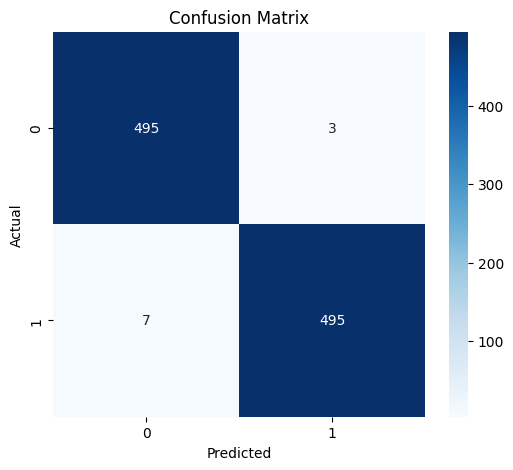

In [12]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  **Calibration Curve - Model Reliability Analysis**  

A **calibration curve** is an essential tool for evaluating how well a model’s predicted probabilities align with the actual likelihood of an event occurring. It helps determine whether a classifier is **overconfident or underconfident** in its predictions.  

---

### 🔹 **What Does a Calibration Curve Represent?**  

- **X-axis (Predicted Probability):** The probabilities assigned by the model for a sample belonging to the "fake" class.  
- **Y-axis (True Probability):** The actual observed frequency of the "fake" class in the dataset.  
- **Dashed Diagonal Line (Ideal Calibration Line):** Represents a **perfectly calibrated** model, where predicted probabilities match the actual likelihood of the event.  

---

### 📊 **Interpreting the Calibration Curve Output**  

✅ **If the curve follows the diagonal line:**  
   - The model is **well-calibrated**, meaning its confidence in predictions accurately reflects real-world probabilities.  
   - For example, when the model predicts **80% probability**, the actual likelihood is also **80%**.  

❌ **If the curve is above the diagonal:**  
   - The model is **underconfident**, meaning it assigns lower probabilities than it should.  
   - Example: When the model predicts **60% probability**, the actual occurrence rate is **80%**, suggesting the model is too conservative.  

❌ **If the curve is below the diagonal:**  
   - The model is **overconfident**, meaning it assigns higher probabilities than it should.  
   - Example: When the model predicts **90% probability**, but the actual occurrence rate is **70%**, indicating that it overestimates certainty.  

---

### 🎯 **Why is Calibration Important?**  

- In a **fraud detection system**, an overconfident model might falsely flag legitimate users.  
- In **medical diagnosis**, miscalibration could lead to **false alarms** or **missed diagnoses**.  
- Proper calibration ensures that decisions based on predicted probabilities are **trustworthy and meaningful**.  

🔎 **Takeaway:** A well-calibrated model is crucial for making informed decisions, especially in applications where trust in probability estimates is essential.

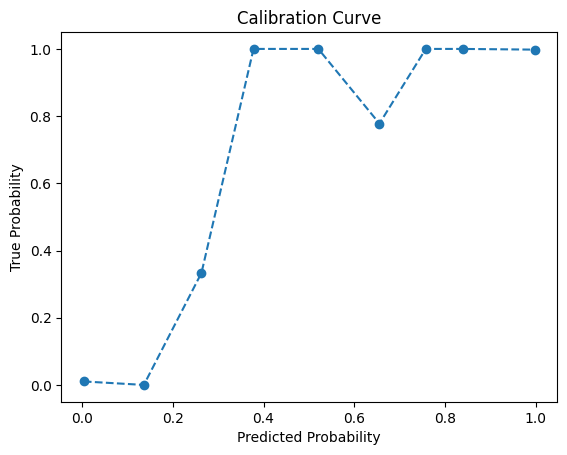

In [13]:
# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.show()